In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)

# Let's do some machine learning!

First we'll import some data. I'm using the famous Panoma dataset from the Kansas Geological Survey, and loading [a version](https://github.com/scienxlab/datasets/tree/main/kgs) from my own collection.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/scienxlab/datasets/main/kgs/panoma-training-data.csv')

df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,Lithology,RHOB,Mineralogy,Siliciclastic
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305,0.664,siltstone,2393.499945,siliciclastic,True
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305,0.661,siltstone,2416.119814,siliciclastic,True
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305,0.658,siltstone,2404.576056,siliciclastic,True
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305,0.655,siltstone,2393.249071,siliciclastic,True
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305,0.647,siltstone,2382.602601,siliciclastic,True


Add a column of Gaussian noise, a completely spurious feature, to make a point later on.

In [3]:
rng = np.random.default_rng(42)

df['Noise'] = rng.normal(size=len(df))

## Make features and target

We're going to predict lithology from well logs..

In [4]:
features = ['GR', 'RHOB', 'PE', 'Noise']
target = 'Lithology'

In [5]:
df[target].value_counts()

Lithology
siltstone     1586
limestone      737
wackestone     628
mudstone       543
sandstone      282
dolomite       190
Name: count, dtype: int64

## Split train and test

What kind of data do we have?

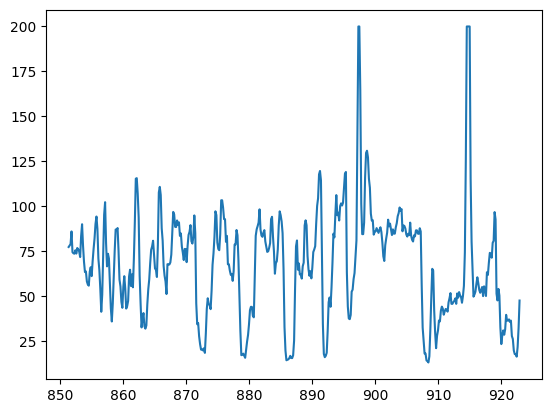

In [8]:
shrimplin = df['Well Name'] == 'SHRIMPLIN'

plt.plot(df.loc[shrimplin, 'Depth'], df.loc[shrimplin, 'GR'])

Like most geoscience data, it is not IID but autocorrelated. So we split by well.

In [6]:
test_wells = ['CRAWFORD', 'STUART']

test_flag = df['Well Name'].isin(test_wells)

X_test = df.loc[test_flag, features]
y_test = df.loc[test_flag, target]
X_train = df.loc[~test_flag, features]
y_train = df.loc[~test_flag, target]

In [7]:
X_train.describe()

,GR,RHOB,PE,Noise
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,66.154671,2280.639520,3.693391,-0.018322
std,28.384586,230.286185,0.852029,1.005407
min,13.250000,1500.000000,0.200000,-3.648413
25%,48.400000,2187.346268,3.100000,-0.685853
50%,66.220000,2338.646882,3.501000,0.003796
75%,79.860000,2435.108529,4.281000,0.639626
max,200.000000,2802.871147,8.094000,3.178854


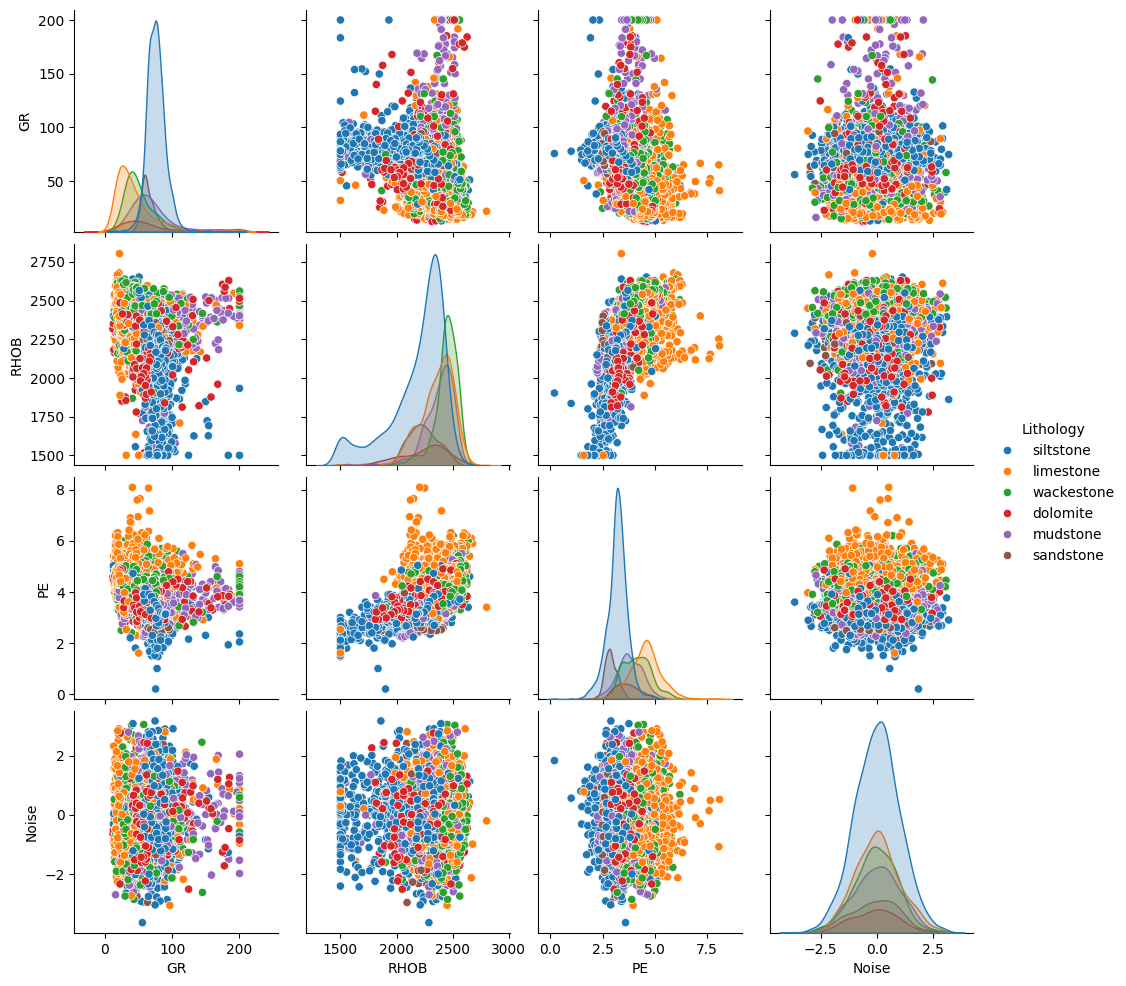

In [10]:
sns.pairplot(df, x_vars=features, y_vars=features, hue='Lithology')

<Axes: >

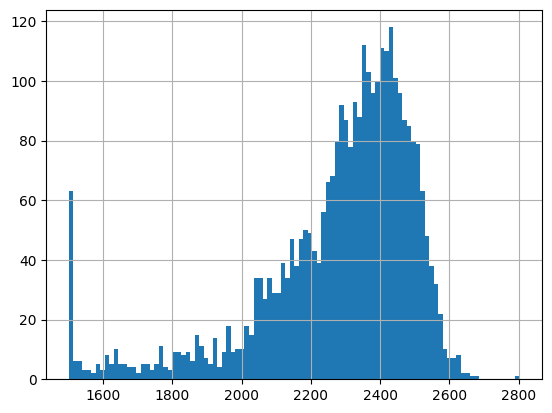

In [11]:
X_train['RHOB'].hist(bins=100)

## What now? 

Look at plots? Analyse a DataFrame? Make a report? Make a dashboard?

## 🚩 `redflag` is here!

In [12]:
import redflag as rf
from importlib.metadata import version

version('redflag')

'0.4.2.dev10+g4562564.d20231209'

## 🚩 `redflag` has functions

In [13]:
rf.is_clipped(X_train['RHOB'])

True

In [14]:
rf.is_imbalanced(y_train)

True

In [15]:
rf.imbalance_degree(y_train)

3.4203357617985457

In [16]:
rf.minority_classes(y_train)

array(['dolomite', 'sandstone', 'mudstone', 'wackestone'], dtype='<U10')

In [33]:
rf.get_outliers(X_train)

array([  70,   71,   72,   73,   74,   75,   93,  139,  142,  175,  176,
        177,  183,  233,  296,  297,  298,  301,  302,  303,  304,  305,
        306,  307,  308,  309,  310,  311,  312,  375,  414,  415,  416,
        417,  418,  419,  463,  531,  532,  533,  534,  575,  576,  577,
        578,  579,  580,  581,  582,  583,  584,  585,  586,  587,  622,
        633,  634,  635,  660,  661,  662,  712,  757,  758,  759,  760,
        768,  769,  770,  771,  772,  773,  774,  775,  776,  779,  780,
        797,  798,  799,  800,  801,  822,  823,  824,  846,  849,  850,
        896,  897,  898,  899,  900,  933,  934,  935,  936,  937,  949,
        995,  996,  997,  998,  999, 1127, 1128, 1129, 1216, 1217, 1314,
       1315, 1316, 1352, 1353, 1354, 1357, 1358, 1359, 1360, 1496, 1497,
       1498, 1546, 1547, 1548, 1567, 1663, 1664, 1665, 1723, 1724, 1725,
       1726, 1740, 1741, 1742, 1743, 1744, 1745, 1754, 1755, 1756, 1757,
       1769, 1778, 1779, 1780, 1781, 1782, 1783, 17

## 🚩 `redflag` has `pandas` accessors

In [17]:
y_train.redflag.minority_classes()

array(['dolomite', 'sandstone', 'mudstone', 'wackestone'], dtype='<U10')

In [18]:
df.redflag.correlation_detector(features)

Feature 0 appears to be autocorrelated.
Feature 1 appears to be autocorrelated.
Feature 2 appears to be autocorrelated.


In [19]:
df.redflag.feature_importances(features, target)

array([0.4063492 , 0.21306097, 0.31850968, 0.05957926])

## 🚩 `redflag` has an `sklearn` pipeline

In [22]:
rf.pipeline

Pipeline(steps=[('rf.imbalance', ImbalanceDetector()),
                ('rf.clip', ClipDetector()),
                ('rf.correlation', CorrelationDetector()),
                ('rf.multimodality', MultimodalityDetector()),
                ('rf.outlier', OutlierDetector()),
                ('rf.distributions', DistributionComparator()),
                ('rf.importance', ImportanceDetector()),
                ('rf.dummy', DummyPredictor())])

In [23]:
model = RandomForestClassifier()

pipe = make_pipeline(
    StandardScaler(),  # Standardize.
    rf.pipeline,       # 🚩 special pipeline.
    model              # The learning algo.
)

In [24]:
pipe = pipe.fit(X_train, y_train)

🚩 The labels are imbalanced by more than the threshold (0.420 > 0.400). See self.minority_classes_ for the minority classes.
🚩 Features 0, 1 have samples that may be clipped.
🚩 Features 0, 1, 2 have samples that may be correlated.
🚩 Feature 0 has a multimodal distribution.
ℹ️ Multimodality detection may not have succeeded for all groups in all features.
🚩 There are more outliers than expected in the training data (316 vs 31).
🚩 Feature 3 has low importance; check for relevance.
ℹ️ Dummy classifier scores: {'f1': 0.279197927401319, 'roc_auc': 0.5023285865078371} (stratified strategy).


The `redflag` pipeline **does not transform anything** and merely passes data through.

The pipeline still functions as normal.

In [25]:
y_pred = pipe.predict(X_test)

🚩 Feature 0 has samples that may be clipped.
🚩 Features 0, 1, 2 have samples that may be correlated.
🚩 There are more outliers than expected in the data (26 vs 8).
🚩 Feature 2 has a distribution that is different from training.


(-0.19470000000000007, 8.488700000000001)

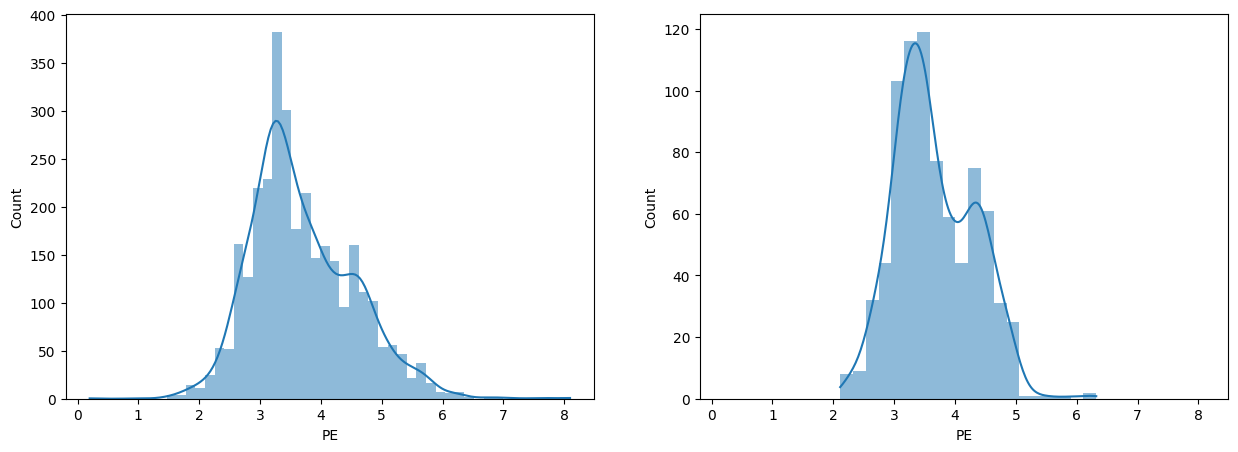

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(X_train.iloc[:, 2], kde=True, lw=0, ax=axs[0])
sns.histplot(X_test.iloc[:, 2], kde=True, lw=0, ax=axs[1])
axs[1].set_xlim(axs[0].get_xlim())

---

&copy; 2024 Matt Hall, licensed CC BY